In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

In [2]:
baredf = pd.read_csv("../data/bot/all.csv", low_memory=False)

In [3]:
baredf = baredf.drop(baredf[baredf['attack'] == 'attack'].index)

In [4]:
baredf.head(5)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1528088521.71201,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.13372,1.12997,770,602,1,DoS,HTTP
1,2,1528088521.71982,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.2,1,2,0.00514243,0.00514243,2,6,1,DoS,HTTP
2,3,1528088521.7206,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.1351,1.12997,770,602,1,DoS,HTTP
3,4,1528088521.72088,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.13514,1.12997,770,602,1,DoS,HTTP
4,5,1528088521.72166,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.13526,1.12997,770,602,1,DoS,HTTP


In [5]:
baredf.dtypes

pkSeqID                             object
stime                               object
flgs                                object
flgs_number                         object
proto                               object
proto_number                        object
saddr                               object
sport                               object
daddr                               object
dport                               object
pkts                                object
bytes                               object
state                               object
state_number                        object
ltime                               object
seq                                 object
dur                                 object
mean                                object
stddev                              object
sum                                 object
min                                 object
max                                 object
spkts                               object
dpkts      

In [6]:
baredf = baredf.drop(columns=['saddr', 'daddr', 'subcategory', 'flgs'])

In [7]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: uniqs: {baredf[col].unique()} ')

pkSeqID: uniqs: ['1' '2' '3' ... '3668520' '3668521' '3668522'] 
stime: uniqs: ['1528088521.71201' '1528088521.71982' '1528088521.7206' ...
 '1529380790.94896' '1529380791.13583' '1529380745.49577'] 
flgs_number: uniqs: ['1' '2' '3' '4' '5' '6' '7' '8' '9'] 
proto: uniqs: ['tcp' 'arp' 'udp' 'icmp' 'ipv6-icmp'] 
proto_number: uniqs: ['1' '2' '3' '4' '5'] 
sport: uniqs: ['49960' '-1' '49962' ... '0x0008' '0x000d' '0x0011'] 
dport: uniqs: ['80' '-1' '30551' ... '42052' '2660' '2664'] 
pkts: uniqs: ['8' '2' '10' '4' '9' '12' '14' '11' '22' '13' '16' '15' '19' '17' '7' '5'
 '56' '6' '50' '3' '67' '18' '1' '30' '5886' '35' '23' '5724' '29' '6900'
 '34' '54' '41' '5900' '42' '20' '21' '29726' '30157' '10056' '16326'
 '18431' '3018' '59453' '59452' '32' '40' '97' '16225' '14751' '53090'
 '53092' '8850' '2378' '26546' '3492' '70057' '35029' '35028' '21369'
 '19442' '70056' '11733' '33' '31' '24' '25' '39' '26' '27' '252' '55'
 '2846' '69595' '34801' '20881' '69600' '34800' '19142' '12183' '4425

In [8]:
ben = baredf.loc[baredf['attack'] != '1']
ben = ben.iloc[:500000, :]
ben.shape

(477, 42)

In [ ]:
pqp

In [68]:
attack = baredf.loc[baredf['attack'] == '1']
attack = attack.iloc[:500000, :]
attack.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
0,1,1528088521.71201,1,tcp,1,49960,80,8,1980,RST,...,1.14297,1.12704,96,75,1.13372,1.12997,770,602,1,DoS
1,2,1528088521.71982,1,arp,2,-1,-1,2,120,CON,...,0.00385682,15267.2,1,2,0.00514243,0.00514243,2,6,1,DoS
2,3,1528088521.7206,1,tcp,1,49962,80,8,2126,RST,...,1.14297,1.12704,96,75,1.1351,1.12997,770,602,1,DoS
3,4,1528088521.72088,1,tcp,1,49964,80,8,2024,RST,...,1.14297,1.12704,96,75,1.13514,1.12997,770,602,1,DoS
4,5,1528088521.72166,1,tcp,1,49966,80,8,2319,RST,...,1.14297,1.12704,96,75,1.13526,1.12997,770,602,1,DoS


In [69]:
baredf.shape

(3668522, 42)

In [70]:
 attack.shape

(500000, 42)

(0, 42)

In [72]:
ben['category'].value_counts()

category
DoS    500000
Name: count, dtype: int64

In [76]:
ben.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
0,1,1528088521.71201,1,tcp,1,49960,80,8,1980,RST,...,1.14297,1.12704,96,75,1.13372,1.12997,770,602,1,DoS
1,2,1528088521.71982,1,arp,2,-1,-1,2,120,CON,...,0.00385682,15267.2,1,2,0.00514243,0.00514243,2,6,1,DoS
2,3,1528088521.7206,1,tcp,1,49962,80,8,2126,RST,...,1.14297,1.12704,96,75,1.1351,1.12997,770,602,1,DoS
3,4,1528088521.72088,1,tcp,1,49964,80,8,2024,RST,...,1.14297,1.12704,96,75,1.13514,1.12997,770,602,1,DoS
4,5,1528088521.72166,1,tcp,1,49966,80,8,2319,RST,...,1.14297,1.12704,96,75,1.13526,1.12997,770,602,1,DoS


In [73]:
baredf = pd.concat([ben, attack])

In [74]:
baredf.shape

(1000000, 42)

In [75]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: unique: {baredf[col].unique()} ')

pkSeqID: unique: ['1' '2' '3' ... '499998' '499999' '500000'] 
stime: unique: ['1528088521.71201' '1528088521.71982' '1528088521.7206' ...
 '1528081372.60775' '1528081372.60776' '1528081372.64237'] 
flgs_number: unique: ['1' '2' '3' '4' '5'] 
proto: unique: ['tcp' 'arp'] 
proto_number: unique: ['1' '2'] 
sport: unique: ['49960' '-1' '49962' ... '1947' '1950' '1951'] 
dport: unique: ['80' '-1' '30551' '30554' '30555' '30552' '30553' '30556' '30558' '30559'
 '30560' '30561' '30564' '30565' '30568' '30569' '30572' '30573' '30578'
 '30579' '30582' '30583' '30586' '30587' '30590' '30591' '30594' '30595'
 '30598' '30599' '30602' '30603' '30606' '30607' '30608' '30609' '30612'
 '30613' '30616' '30617' '30620' '30621' '30626' '30627' '30630' '30631'
 '30634' '30635' '30638' '30639' '30640' '30641' '30557' '30562' '30563'
 '30566' '30567' '30570' '30571' '30574' '30575' '30576' '30577' '30580'
 '30581' '30584' '30585' '30588' '30589' '30592' '30593' '30596' '30597'
 '30600' '30601' '30604' '306

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#mapeamento = {valor: int(indice + 1) for indice, valor in enumerate(baredf['flgs'].unique())}

In [39]:
baredf.head(5)

,pkSeqID,stime,flgs_number,proto,proto_number,sport,dport,pkts,bytes,state,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category
0,1,1528088521.71201,1,tcp,1,49960,80,8,1980,RST,...,1.14297,1.12704,96,75,1.13372,1.12997,770,602,1,DoS
1,2,1528088521.71982,1,arp,2,-1,-1,2,120,CON,...,0.00385682,15267.2,1,2,0.00514243,0.00514243,2,6,1,DoS
2,3,1528088521.7206,1,tcp,1,49962,80,8,2126,RST,...,1.14297,1.12704,96,75,1.1351,1.12997,770,602,1,DoS
3,4,1528088521.72088,1,tcp,1,49964,80,8,2024,RST,...,1.14297,1.12704,96,75,1.13514,1.12997,770,602,1,DoS
4,5,1528088521.72166,1,tcp,1,49966,80,8,2319,RST,...,1.14297,1.12704,96,75,1.13526,1.12997,770,602,1,DoS


In [40]:
baredf['proto'] = label_encoder.fit_transform(baredf['proto'])

In [41]:
baredf['dport'] = label_encoder.fit_transform(baredf['dport'].astype(str))
baredf['sport'] = label_encoder.fit_transform(baredf['sport'].astype(str))

In [42]:
baredf['category'] = label_encoder.fit_transform(baredf['category'])
baredf['state'] = label_encoder.fit_transform(baredf['state'])

In [43]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{col}: unique: {baredf[col].unique()}')

pkSeqID: unique: ['1' '2' '3' ... '499998' '499999' '500000']
stime: unique: ['1528088521.71201' '1528088521.71982' '1528088521.7206' ...
 '1528081372.60775' '1528081372.60776' '1528081372.64237']
flgs_number: unique: ['1' '2' '3' '4' '5']
proto_number: unique: ['1' '2']
pkts: unique: ['8' '2' '10' '4' '9' '12' '14' '11' '22' '13' '16' '15' '19' '17' '7' '5'
 '56' '6' '50' '3' '67' '18']
bytes: unique: ['1980' '120' '2126' '2024' '2319' '1983' '1978' '2021' '1996' '2038'
 '2300' '2049' '2014' '1953' '1959' '2172' '2264' '2355' '2109' '2332'
 '2096' '2065' '2045' '1964' '2056' '2080' '2107' '2251' '1906' '2284'
 '2085' '2004' '2052' '2138' '2217' '2173' '2115' '2205' '2157' '2071'
 '2183' '2077' '2121' '2152' '2087' '2147' '2098' '2017' '2204' '2103'
 '2240' '2133' '2117' '2354' '2134' '2035' '2062' '2037' '2053' '2072'
 '2023' '2047' '2009' '2088' '2079' '2048' '2108' '1960' '2105' '2112'
 '134' '2241' '240' '1971' '2249' '2084' '2153' '2050' '2230' '1947'
 '2111' '2267' '2068' '2212' 

In [48]:
!pip install seabron

ERROR: Could not find a version that satisfies the requirement seabron (from versions: none)
ERROR: No matching distribution found for seabron


In [49]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [50]:
baredf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000002,1.0,0.2,1.0,0.5,0.677536,1.0,0.119403,0.282898,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.559607e-05,8.531295e-05,0.770,0.602,1.0,0.0
1,0.000004,1.0,0.2,0.0,1.0,0.000000,0.0,0.029851,0.017145,0.0,...,2.449086e-07,1.000000,0.01,0.02,3.882544e-07,3.882544e-07,0.002,0.006,1.0,0.0
2,0.000006,1.0,0.2,1.0,0.5,0.677567,1.0,0.119403,0.303758,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.570026e-05,8.531295e-05,0.770,0.602,1.0,0.0
3,0.000008,1.0,0.2,1.0,0.5,0.677597,1.0,0.119403,0.289184,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.570328e-05,8.531295e-05,0.770,0.602,1.0,0.0
4,0.000010,1.0,0.2,1.0,0.5,0.677628,1.0,0.119403,0.331333,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.571234e-05,8.531295e-05,0.770,0.602,1.0,0.0


In [51]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [52]:
baredf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000002,1.0,0.2,1.0,0.5,0.677536,1.0,0.119403,0.282898,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.559607e-05,8.531295e-05,0.770,0.602,1.0,0.0
1,0.000004,1.0,0.2,0.0,1.0,0.000000,0.0,0.029851,0.017145,0.0,...,2.449086e-07,1.000000,0.01,0.02,3.882544e-07,3.882544e-07,0.002,0.006,1.0,0.0
2,0.000006,1.0,0.2,1.0,0.5,0.677567,1.0,0.119403,0.303758,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.570026e-05,8.531295e-05,0.770,0.602,1.0,0.0
3,0.000008,1.0,0.2,1.0,0.5,0.677597,1.0,0.119403,0.289184,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.570328e-05,8.531295e-05,0.770,0.602,1.0,0.0
4,0.000010,1.0,0.2,1.0,0.5,0.677628,1.0,0.119403,0.331333,1.0,...,7.257874e-05,0.000074,0.96,0.75,8.571234e-05,8.531295e-05,0.770,0.602,1.0,0.0


In [53]:
x=baredf.iloc[:,:-1]
y=baredf[41]
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 41, dtype: float64

In [54]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [55]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

1.0

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

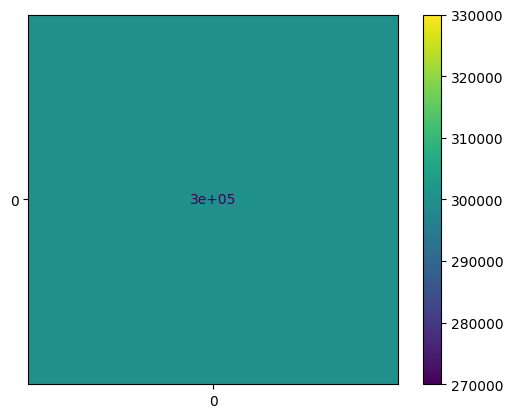

In [56]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [32]:
baredf.to_csv('botClean.csv', index=False)